# Séries de Fourier


## Introduction

Une **série de Fourier** permet de représenter toute fonction périodique (suffisamment régulière) sous forme de somme d'ondes sinusoïdales.

Pour une fonction $2\pi$‑périodique :

$$
f(x) \;=\; \frac{a_0}{2} \;+\; \sum_{n=1}^{\infty}\Bigl(a_n\cos nx \;+\; b_n\sin nx\Bigr),
\quad
\begin{cases}
a_n \;=\; \dfrac{1}{\pi}\displaystyle\int_{-\pi}^{\pi} f(x)\cos nx \,dx \\[6pt]
b_n \;=\; \dfrac{1}{\pi}\displaystyle\int_{-\pi}^{\pi} f(x)\sin nx \,dx
\end{cases}
$$

### À quoi ça sert ?
* **Analyse spectrale** : identifier les fréquences composant un signal (audio, vibrations, biomédical…).  
* **Filtrage / compression** : ne garder que les harmoniques utiles (JPEG, MP3, égaliseurs audio).  
* **Résolution d'EDP** : décomposition modale pour la chaleur, les ondes…  
* **Synthèse** : construire des formes d'ondes complexes à partir d'harmoniques.



## Séries de Fourier usuelles (période $2\pi$)

| Signal | Série | Commentaire |
|--------|-------|-------------|
| Onde carrée $\operatorname{sgn}(\sin x)$ | $\displaystyle \frac{4}{\pi}\!\sum_{k=0}^{\infty}\frac{\sin\!\bigl((2k+1)x\bigr)}{2k+1}$ | seulement les sinus impairs |
| Onde dents de scie $x$ (mod $2\pi$) | $\displaystyle -\sum_{n=1}^{\infty}\frac{\sin nx}{n}$ | harmoniques toutes présentes, amplitude $\propto1/n$ |
| Onde triangulaire $\|x\|$ sur $[-\pi,\pi]$ | $\displaystyle \frac{\pi}{2}-\frac{4}{\pi}\sum_{k=0}^{\infty}\frac{\cos\!\bigl((2k+1)x\bigr)}{(2k+1)^2}$ | amplitude $\propto1/n^2$ |


In [1]:

import numpy as np
import matplotlib.pyplot as plt


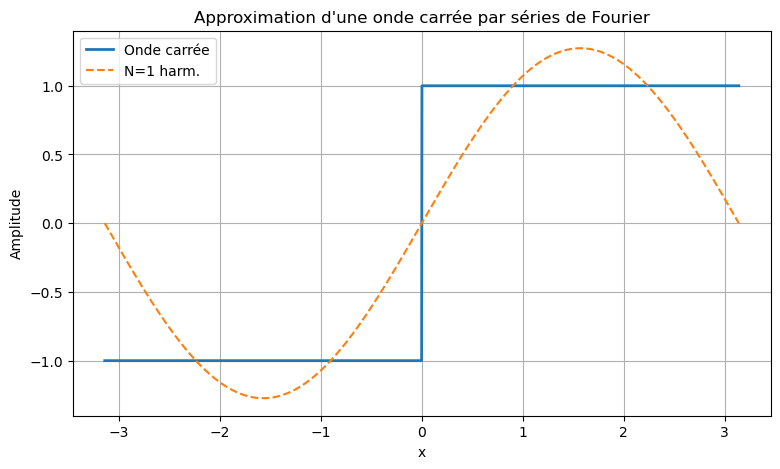

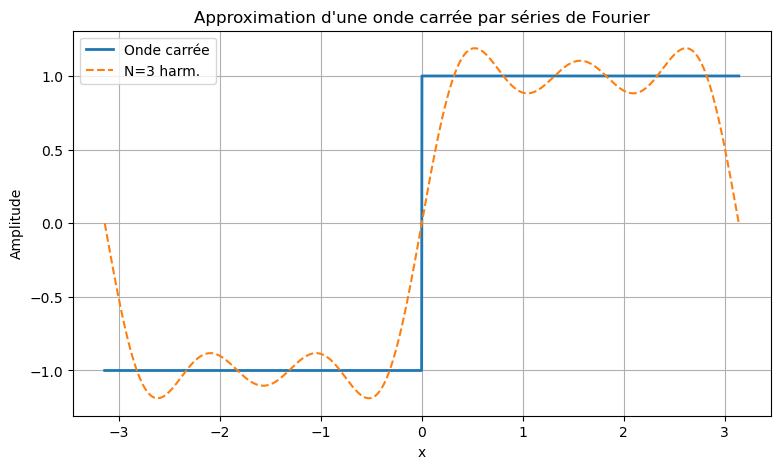

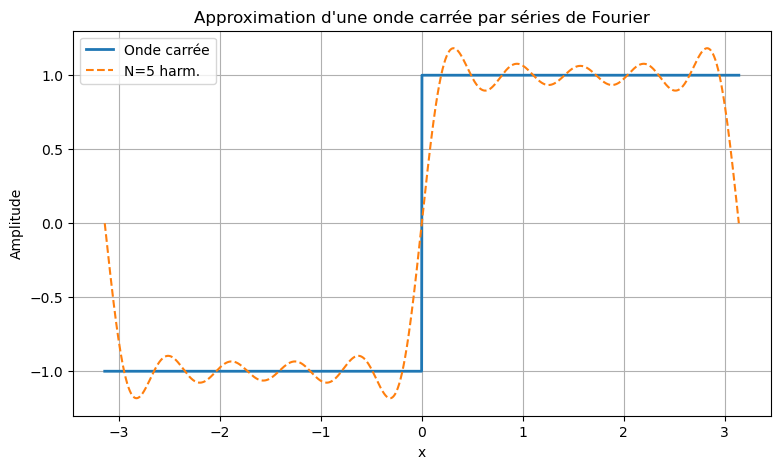

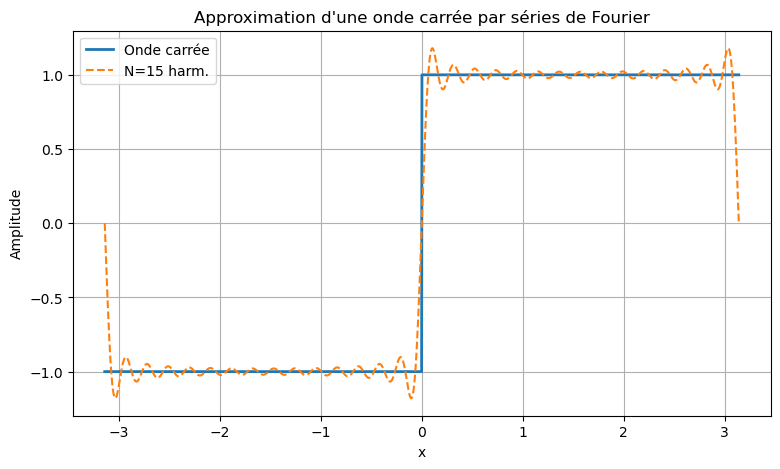

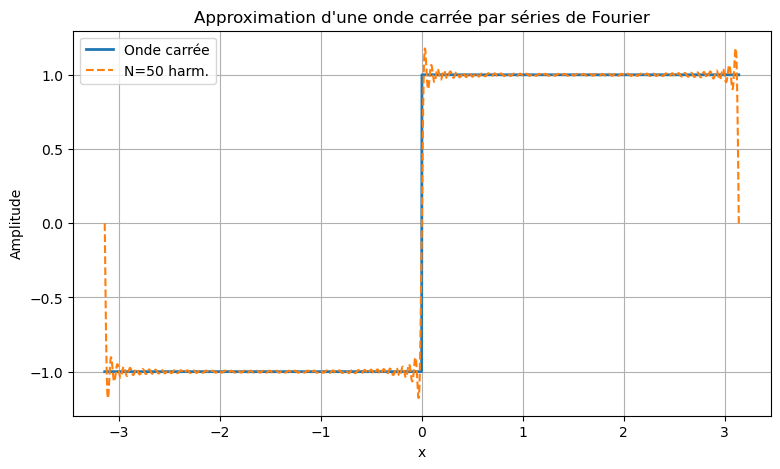

In [4]:

def square_wave(x):
    return np.sign(np.sin(x))

def square_partial(x, N):
    k = np.arange(0, N)
    return (4/np.pi) * np.sum(np.sin((2*k+1)[:,None]*x)/(2*k+1)[:,None], axis=0)

x = np.linspace(-np.pi, np.pi, 2000)
f = square_wave(x)

orders = [1, 3, 5, 15, 50]

for N in orders:
    plt.figure(figsize=(9,5))
    plt.plot(x, f, label='Onde carrée', linewidth=2)
    plt.plot(x, square_partial(x, N), '--', label=f'N={N} harm.')
    plt.title('Approximation d\'une onde carrée par séries de Fourier')
    plt.xlabel('x'); plt.ylabel('Amplitude')
    plt.grid(); plt.legend()
    plt.show()



## Exemple : filtrage passe-bas


## Création du signal bruité

In [ ]:

# On crée un signal sinusoïdal de fréquence 5 Hz
fs = 1_000  # fréquence d'échantillonnage (Hz)
T = 1.0 # durée d'observation (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)

f0 = 5 # fréquence fondamentale (Hz)
signal_clean = np.sin(2*np.pi*f0*t) # onde sinusoïdale "idéale"

# Ajout d'un bruit composite
noise_hf = 0.5 * np.sin(2*np.pi*60*t) # bruit sinusoïdal 60 Hz
noise_rw = 0.3 * np.random.randn(t.size) # bruit blanc gaussien
signal_noisy = signal_clean + noise_hf + noise_rw


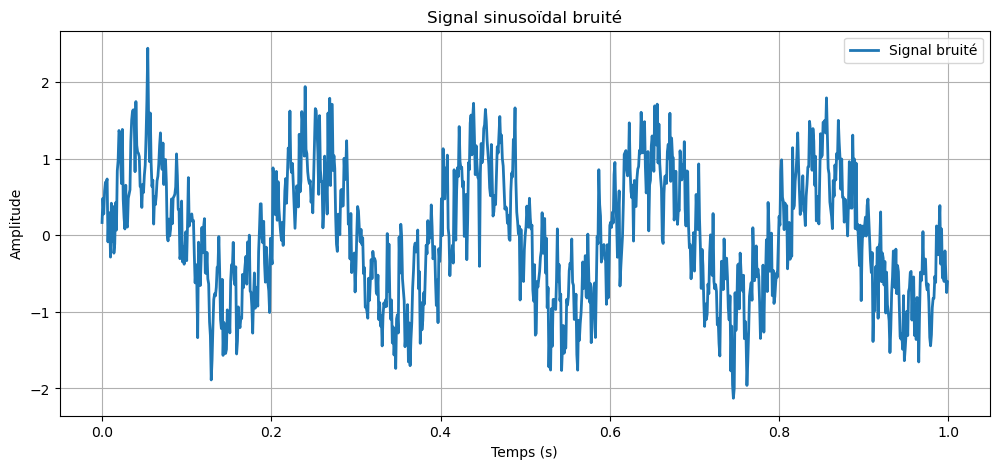

In [10]:
# Affichage du signal bruité

plt.figure(figsize=(12, 5))
plt.plot(t, signal_noisy, label='Signal bruité', linewidth=2)
plt.title('Signal sinusoïdal bruité')
plt.xlabel('Temps (s)'); plt.ylabel('Amplitude')
plt.grid(); plt.legend()
plt.show()

## On applique la transformée de Fourier

In [ ]:

# Transformée de Fourier directe (rfft : partie réelle seulement)
F = np.fft.rfft(signal_noisy)
freqs = np.fft.rfftfreq(t.size, 1/fs)

# Filtrage passe‑bas : on annule les fréquences au‑delà du cutoff
cutoff = 20 # seuil (Hz)
F_filt = F.copy()
F_filt[freqs > cutoff] = 0 # suppression des harmoniques HF


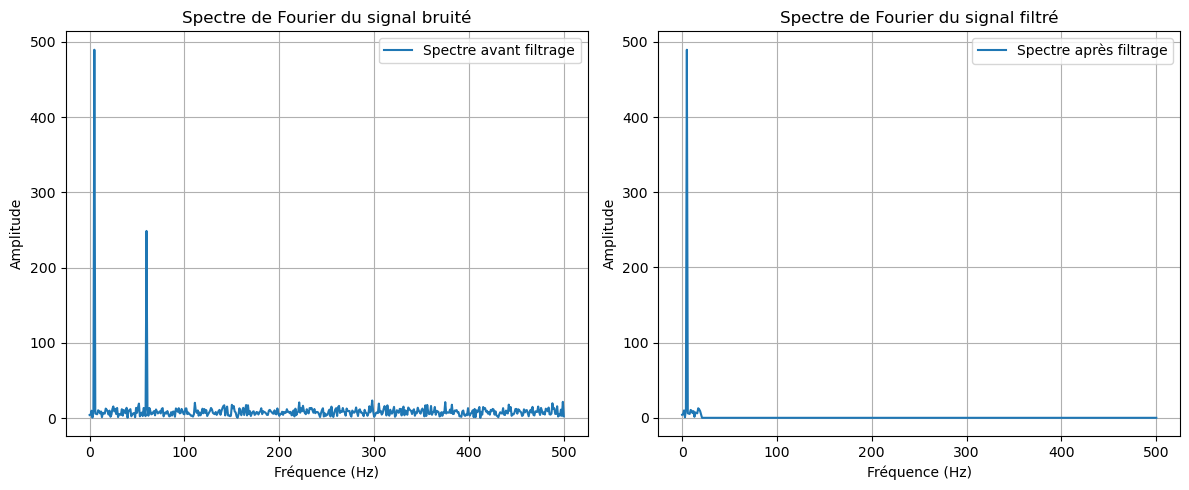

In [12]:
# On visualise le spectre avant/après filtrage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(freqs, np.abs(F), label='Spectre avant filtrage')
plt.title('Spectre de Fourier du signal bruité')
plt.xlabel('Fréquence (Hz)'); plt.ylabel('Amplitude')
plt.grid(); plt.legend()
plt.subplot(1, 2, 2)
plt.plot(freqs, np.abs(F_filt), label='Spectre après filtrage')
plt.title('Spectre de Fourier du signal filtré')
plt.xlabel('Fréquence (Hz)'); plt.ylabel('Amplitude')
plt.grid(); plt.legend()
plt.tight_layout()
plt.show()

## On revient dans l'espace de départ avec la transformée inverse

In [ ]:

# Transformée inverse
signal_filt = np.fft.irfft(F_filt)

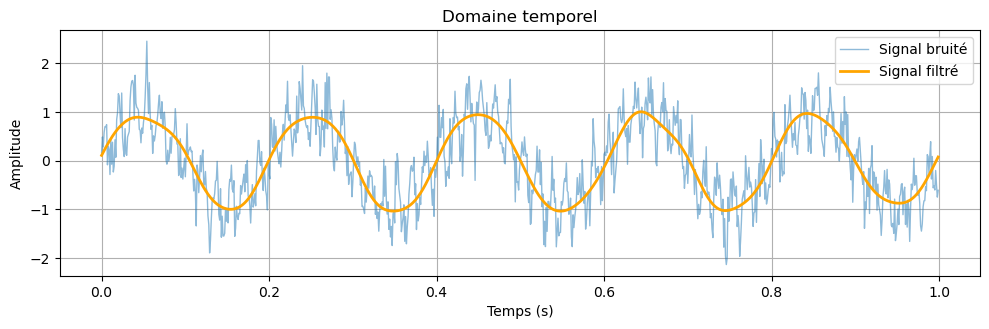

In [19]:
# On affiche le signal filtré
plt.figure(figsize=(10, 6))

# Signaux dans le domaine temporel
plt.subplot(2, 1, 1)
plt.plot(t, signal_noisy, label="Signal bruité", linewidth=1, alpha=0.5)
plt.plot(t, signal_filt, label="Signal filtré", linewidth=2, color="orange")
plt.title("Domaine temporel")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

Les séries de Fourier offrent une passerelle puissante entre temps et fréquence. En jouant sur les harmoniques, on peut analyser, filtrer et synthétiser des signaux avec précision.